# Wholesale Customers Segmentation using Clustering

<img src="https://miro.medium.com/1*47pO6CIvMStUOdFTFz3cCA.png">

## 🎯 Project Objective

The main objective of this project is to perform **customer segmentation** using unsupervised learning techniques. 
By analyzing annual spending patterns across different product categories, the goal is to identify distinct customer groups with similar purchasing behaviors.

This clustering-based approach enables businesses to better understand customer profiles and supports data-driven decisions in areas such as marketing strategy, inventory management, and customer relationship management.


In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

## 🔍 Exploratory Data Analysis (EDA)

Exploratory Data Analysis was conducted to understand the structure and distribution of the dataset.
Histograms and boxplots revealed that customer spending variables are **highly skewed** and contain significant **outliers**, especially in categories such as Fresh, Grocery, and Milk.

Correlation analysis showed strong positive relationships between certain product categories, particularly between **Grocery and Detergents_Paper**, and between **Milk and Grocery**. 
Scatter plots and pair plots further highlighted natural groupings among customers, motivating the use of clustering algorithms to uncover hidden segments.

In [2]:
df = pd.read_csv("/kaggle/input/wholesale-customers-data-set/Wholesale customers data.csv")

## 📊 Dataset Description

The Wholesale Customers dataset contains annual spending information of customers across different product categories. 
Each record represents a customer and includes expenditure amounts on products such as Fresh, Milk, Grocery, Frozen, Detergents_Paper, and Delicassen.

Additionally, two categorical features are included:
- Channel: Customer type (e.g., retail or horeca)
- Region: Geographical region of the customer

The dataset consists of 440 observations and 8 features. 
Since there is no target variable, this problem is approached as an **unsupervised clustering task** aimed at discovering hidden customer segments based on purchasing behavior.


In [3]:
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [4]:
df.tail()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867
438,1,3,10290,1981,2232,1038,168,2125
439,1,3,2787,1698,2510,65,477,52


In [5]:
df.shape

(440, 8)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


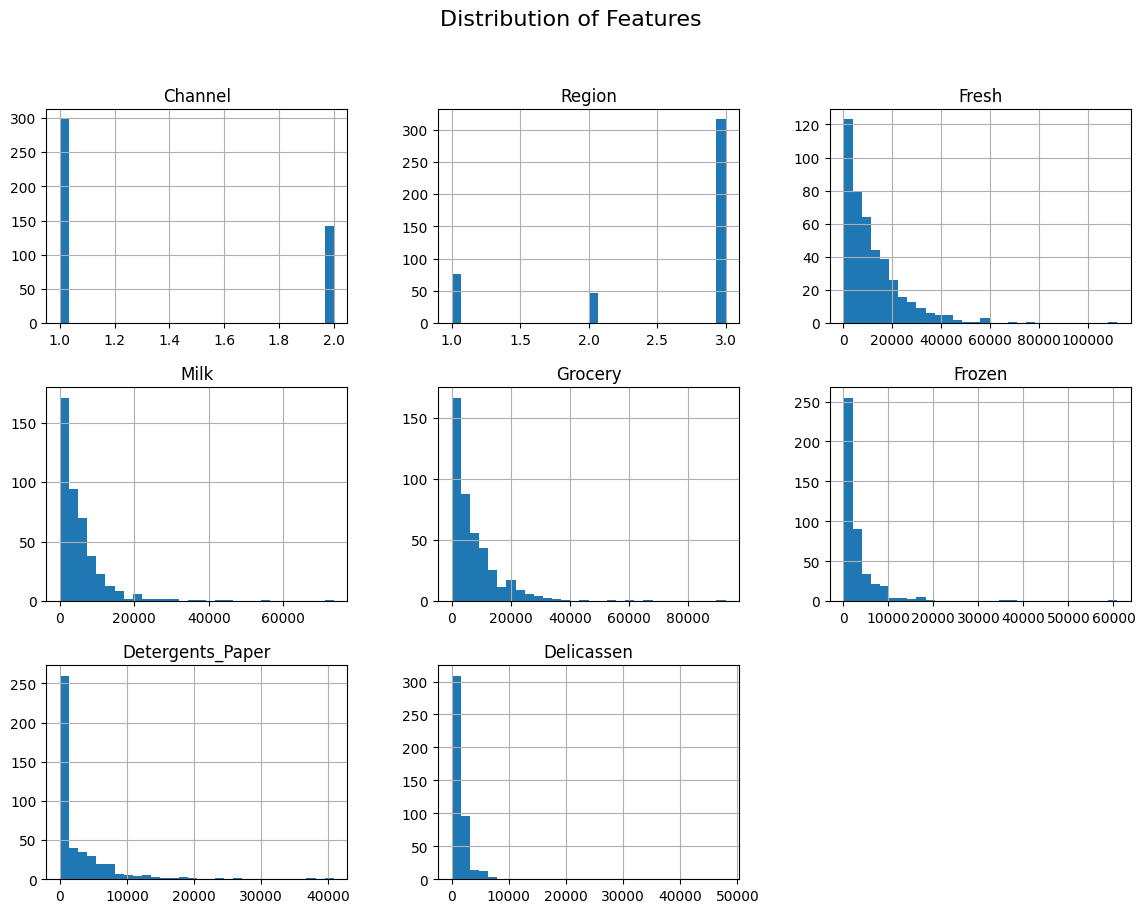

In [7]:
df.hist(figsize=(14,10), bins=30)
plt.suptitle("Distribution of Features", fontsize=16)
plt.show()

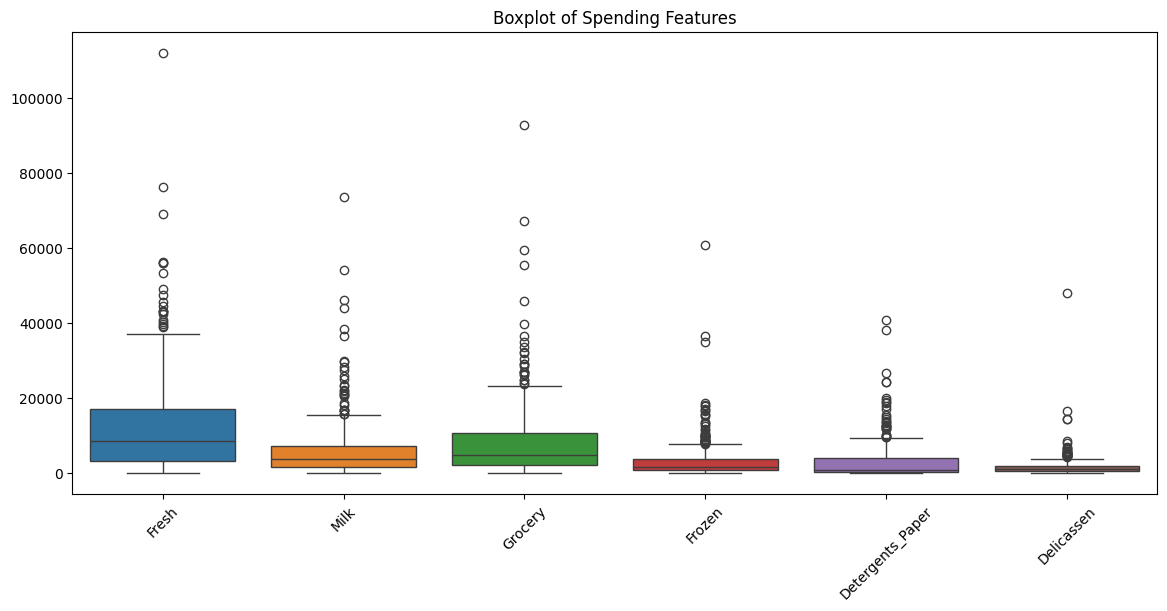

In [9]:
plt.figure(figsize=(14,6))
sns.boxplot(data=df.iloc[:, 2:]) 
plt.xticks(rotation=45)
plt.title("Boxplot of Spending Features")
plt.show()

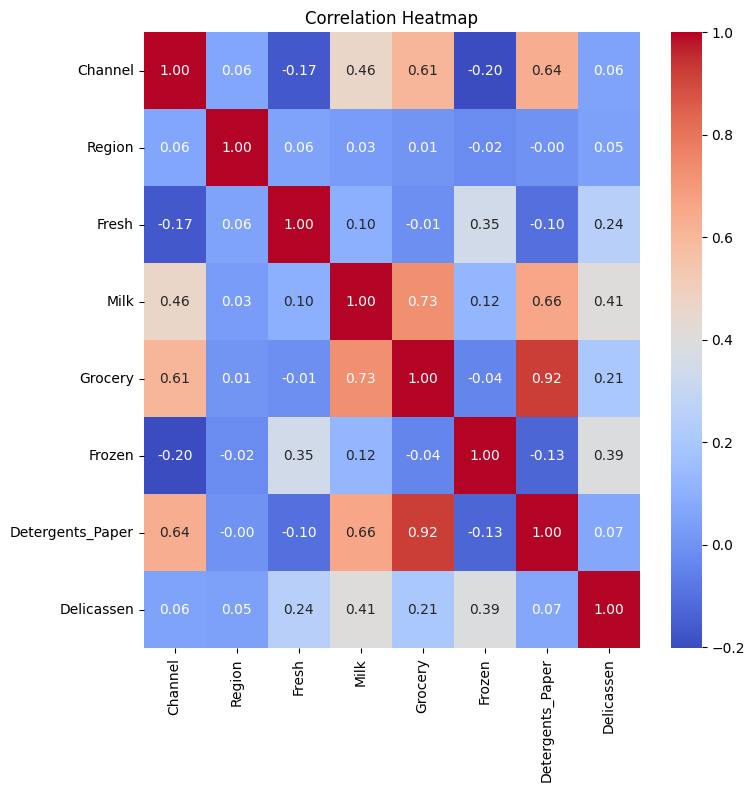

In [12]:
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

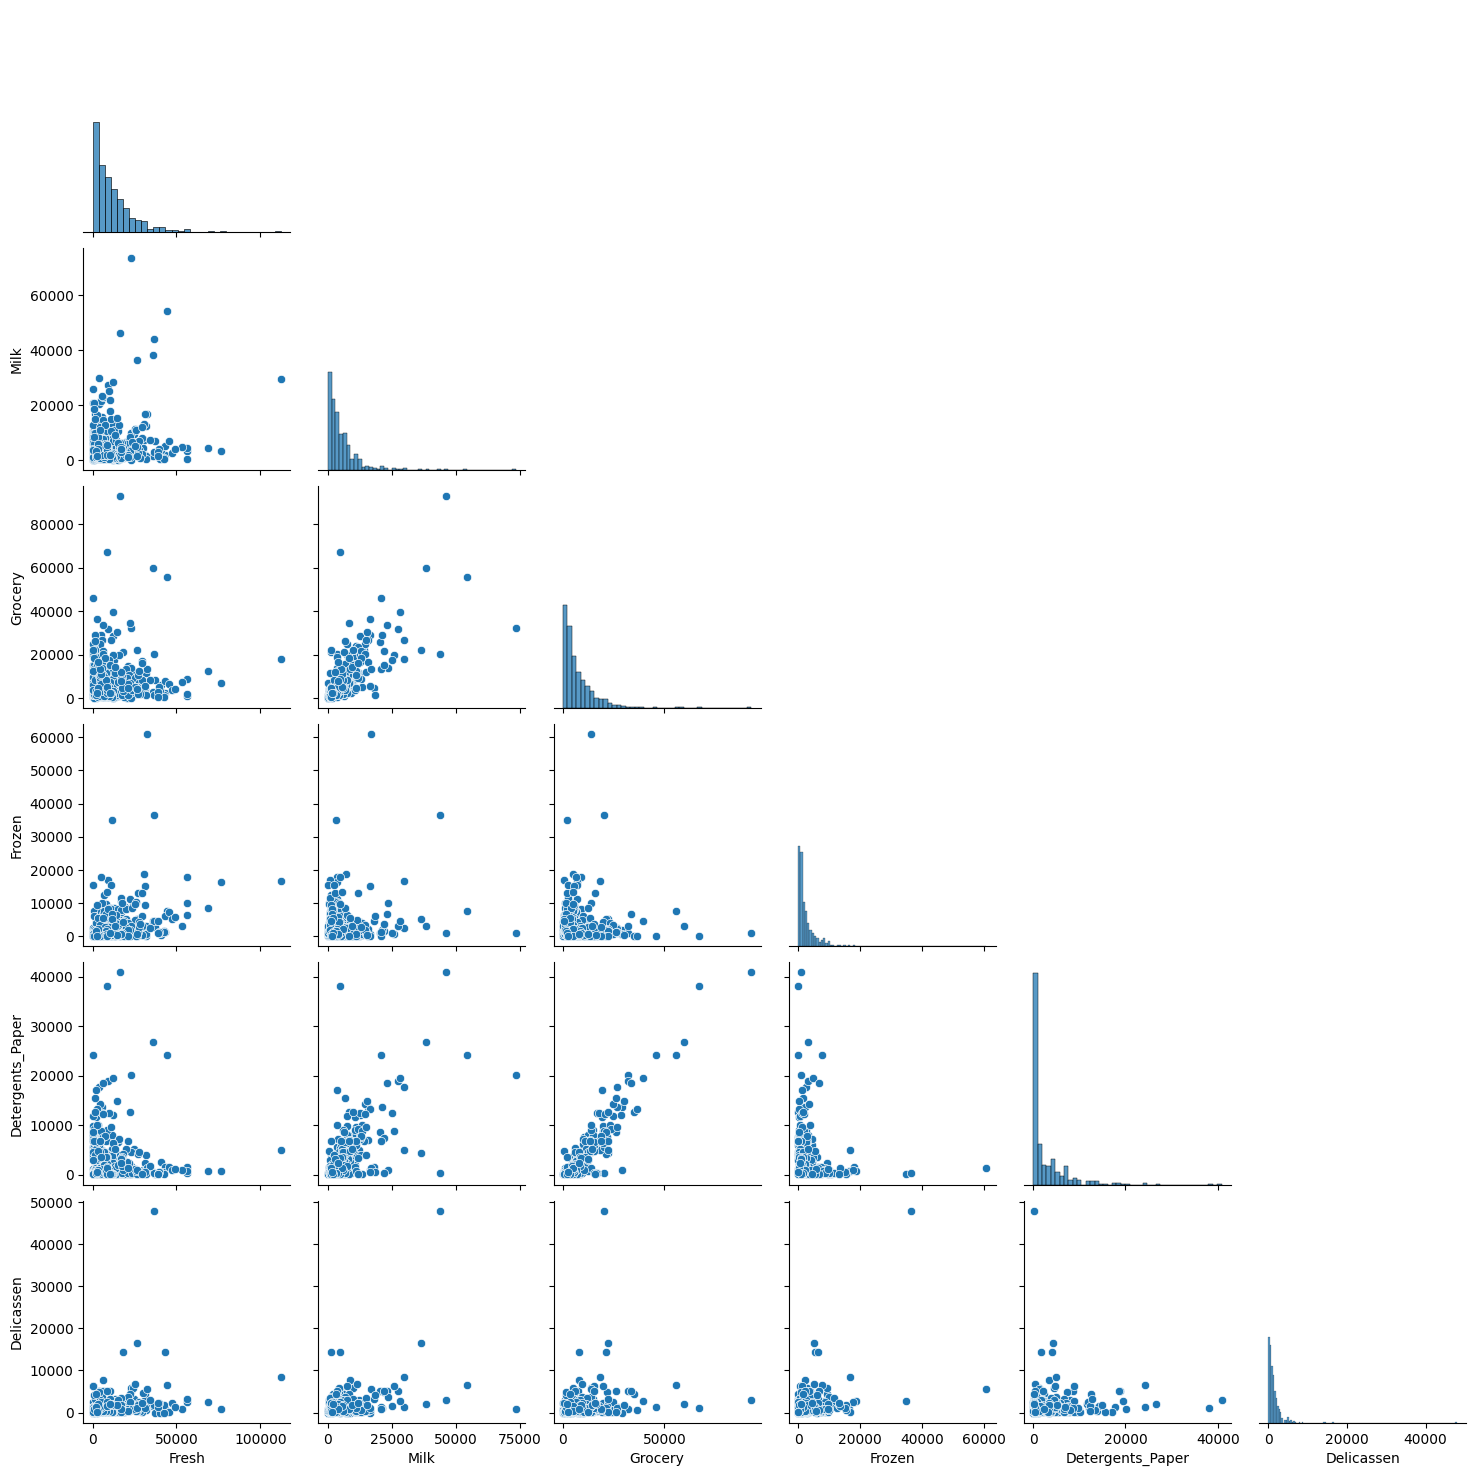

In [11]:
sns.pairplot(df.iloc[:, 2:], corner=True)
plt.show()

## 🧹 Data Preprocessing

Before applying clustering algorithms, the data was preprocessed to ensure meaningful and reliable results.
Only numerical spending features were selected for clustering, while categorical variables such as Channel and Region were excluded to avoid bias.

Due to large differences in feature scales and the presence of extreme values, **StandardScaler** was applied to normalize the data.
This step ensures that all features contribute equally to distance-based clustering algorithms such as K-Means.


In [13]:
x = df.iloc[:, 2:]

In [15]:
scaler = StandardScaler()

In [16]:
x_scaled = scaler.fit_transform(x)

## 🤖 Model Training

The K-Means clustering algorithm was used to segment customers based on their spending patterns.
The optimal number of clusters was determined using the **Elbow Method**, which indicated that **three clusters** provide the best balance between model complexity and within-cluster variance.

After selecting the optimal number of clusters, K-Means was applied to the scaled data to assign each customer to a cluster.
Principal Component Analysis (PCA) was then used to visualize the clusters in a two-dimensional space.


In [17]:
wcss = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(x_scaled)
    wcss.append(kmeans.inertia_)

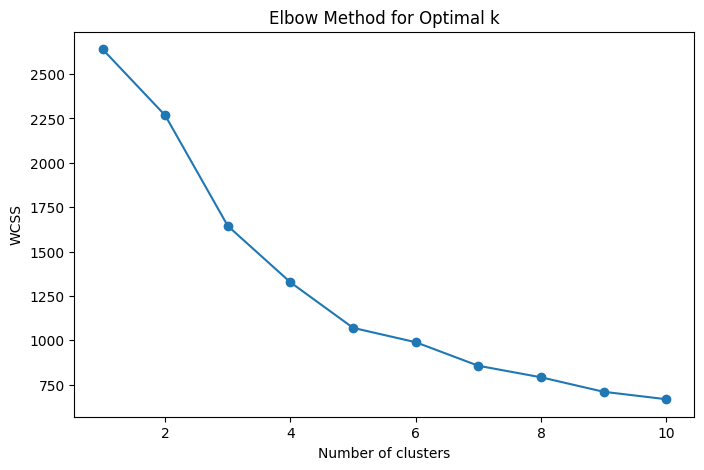

In [18]:
plt.figure(figsize=(8,5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title("Elbow Method for Optimal k")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

In [19]:
kmeans = KMeans(n_clusters=3, random_state=42)

In [20]:
clusters = kmeans.fit_predict(x_scaled)

In [21]:
df["cluster"] = clusters

In [22]:
df["cluster"].value_counts()

cluster
0    350
1     53
2     37
Name: count, dtype: int64

In [24]:
pca = PCA(n_components=2)

In [25]:
x_pca = pca.fit_transform(x_scaled)

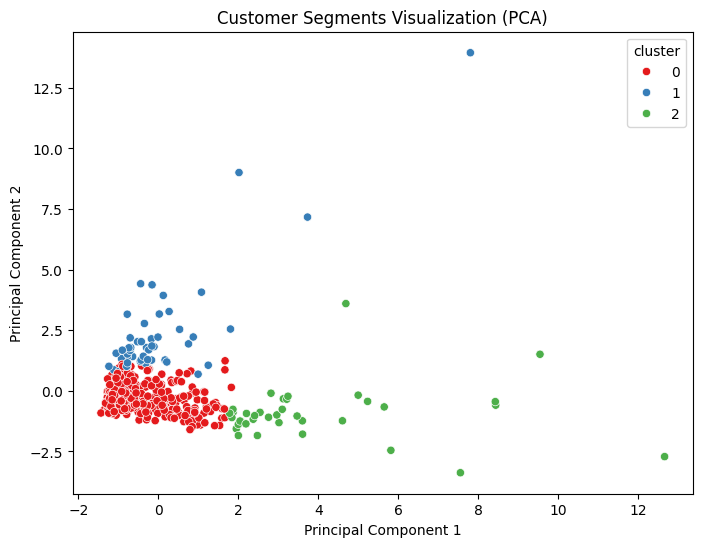

In [26]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=x_pca[:,0],y=x_pca[:,1],hue=df["cluster"],palette="Set1")
plt.title("Customer Segments Visualization (PCA)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

In [27]:
cluster_profile = df.groupby("cluster").mean()

In [28]:
cluster_profile

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
cluster,,,,,,,,
0,1.282857,2.534286,8935.500000,4228.528571,5848.034286,2167.231429,1913.605714,1102.120000
1,1.113208,2.698113,34540.113208,5860.358491,6122.622642,9841.735849,981.471698,3664.245283
2,2.000000,2.405405,8704.864865,20534.405405,30466.243243,1932.621622,14758.837838,2459.351351


## 🏆 Results Comparison (Cluster Interpretation)

K-Means clustering (k=3) successfully segmented customers into three distinct groups based on their annual spending patterns.
PCA visualization shows clear separation between clusters, indicating meaningful customer segmentation.

### Cluster Profiles (Mean Spending)

- **Cluster 0 – Balanced / Low-to-Medium Spenders:**  
  Customers in this cluster show relatively moderate spending across all product categories, with no extreme emphasis on a single category.

- **Cluster 1 – Fresh-Focused Customers:**  
  This cluster is characterized by very high spending on **Fresh products**, along with higher spending on **Frozen** and **Delicatessen** items.  
  This pattern is often associated with customers such as restaurants, hotels, or businesses requiring fresh inventory.

- **Cluster 2 – Grocery & Dairy Heavy Customers:**  
  Customers in this segment spend significantly more on **Grocery** and **Milk**, and also show higher spending on **Detergents_Paper**.  
  This profile resembles retail-oriented or supermarket-style purchasing behavior.

Overall, the clustering results highlight clear customer purchasing behaviors and provide actionable segments for targeted marketing, inventory planning, or customer relationship management.


In [29]:
import joblib

joblib.dump(scaler, "scaler.joblib")
joblib.dump(kmeans, "kmeans_wholesale.joblib")
joblib.dump(list(x.columns), "feature_names.joblib")

['feature_names.joblib']